In [1]:
#to ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
#import breast cancer dataset from sklearn

from sklearn.datasets import load_breast_cancer

dataset = load_breast_cancer()

In [3]:
#print description of the dataset

print(dataset.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry 
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 3 is Mean Radius, f

In [4]:
#get features and labels

features = dataset.data
labels = dataset.target

In [5]:
#apply train_test_split

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size = 0.20, shuffle = True)

In [6]:
#use Support Vector Machines for classification

from sklearn.svm import SVC
classifier = SVC()

In [7]:
#define parameter set for grid-search

parameter_set = {'C' : [1e-2, 1e-1, 1e0, 1e1, 1e2, 1e3, 1e4, 1e5, 1e6, 1e7, 1e8]}

In [8]:
#define scorer function

from sklearn.metrics import make_scorer, f1_score

score_function = make_scorer(f1_score)

In [9]:
#apply grid-search

from sklearn.model_selection import GridSearchCV

GridSearcher = GridSearchCV(classifier, param_grid=parameter_set, cv=10, scoring=score_function, return_train_score=True)

GridSearcher.fit(X_train, y_train)

GridSearchCV(cv=10, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.01, 0.1, 1.0, 10.0, 100.0, 1000.0, 10000.0,
                               100000.0, 1000000.0, 10000000.0, 100000000.0]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring=make_scorer(f1_score), verbose=0)

In [10]:
#get best hyperparameter set for SVC

GridSearcher.best_estimator_

SVC(C=10000.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [11]:
#get train and validation scores

mean_train_scores = GridSearcher.cv_results_['mean_train_score']
mean_validation_scores = GridSearcher.cv_results_['mean_test_score']
print('mean train scores = '+str(mean_train_scores))
print('mean validation scores = '+str(mean_validation_scores))

mean train scores = [0.84509945 0.91466433 0.9353622  0.9386488  0.9531322  0.96648698
 0.97103994 0.9802674  0.98523113 0.99406249 0.98313573]
mean validation scores = [0.84153222 0.91450117 0.93533778 0.93450416 0.94800482 0.96294589
 0.96651732 0.95964901 0.9610959  0.9507196  0.95016513]


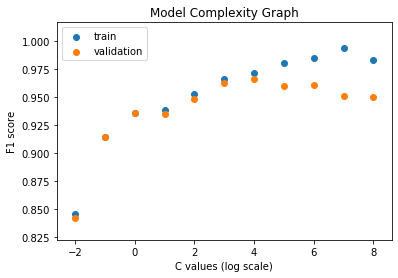

In [12]:
#plot Model Complexity Graph

import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

plt.figure()
plt.scatter(np.log10(parameter_set['C']), mean_train_scores, label = 'train')
plt.scatter(np.log10(parameter_set['C']), mean_validation_scores, label = 'validation')
plt.xlabel('C values (log scale)')
plt.ylabel('F1 score')
plt.title('Model Complexity Graph')
plt.legend()
plt.show()